# **Mango Leaf Disease Dataset Image Classifier🥭 🍃 🍂**

In [1]:
# Mounting on Gdrive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# Import all required libraries


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import pathlib
from PIL import Image
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model

In [3]:
data_dir = "/content/drive/MyDrive/Mango_leaf_disease_dataset/"
data_dir = pathlib.Path(data_dir)
print(data_dir)

/content/drive/MyDrive/Mango_leaf_disease_dataset


## Total count of images

In [4]:
total_images = len(list(data_dir.glob('*/*/')))
print(total_images)

4000


# Finding labels

In [5]:
labels_list = ['Anthracnose', 'Bacterial canker', 'Cutting Weevil', 'Die Back', 'Gall Midge', 'Healthy', 'Powdery Mildew', 'Sooty Mould']

for label in labels_list :
  print(label)
  for img in list(data_dir.glob(label + '/*')):
    #PIL.Image.open(str(img[0]))
    img_src = os.path.basename(img)
    img_name = os.path.splitext(img_src)[0]
    open_image = Image.open(img)
    image_path = str(data_dir) + "/" + label + "/" + img_name + ".jpg";
    rgb_im = open_image.convert('RGB')
    rgb_im.save(image_path)

Anthracnose
Bacterial canker
Cutting Weevil
Die Back
Gall Midge
Healthy
Powdery Mildew
Sooty Mould


# Splitting data

In [6]:
# defining the batch size 
batch_size = 32
img_height = 224
img_width = 224

# training data
train_data = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

#validation data
val_data = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 4000 files belonging to 8 classes.
Using 3200 files for training.
Found 4000 files belonging to 8 classes.
Using 800 files for validation.


In [7]:
class_names = train_data.class_names
print(class_names)

['Anthracnose', 'Bacterial Canker', 'Cutting Weevil', 'Die Back', 'Gall Midge', 'Healthy', 'Powdery Mildew', 'Sooty Mould']


# Data Visaualization

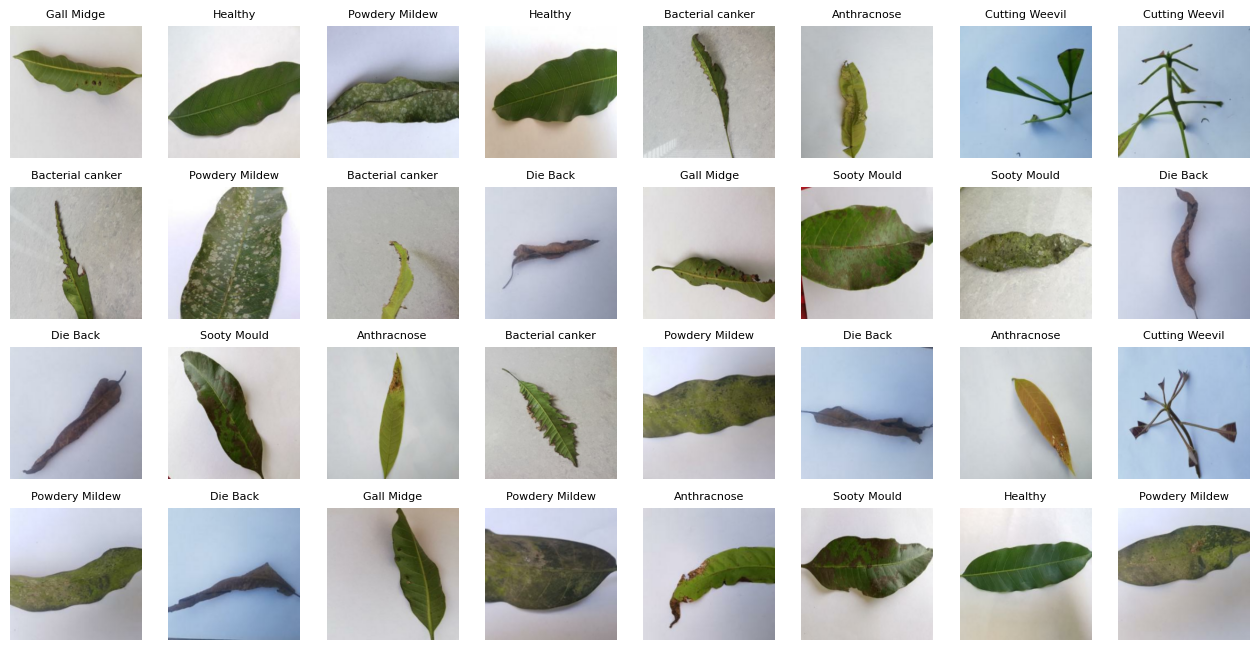

In [8]:
import matplotlib.pyplot as plt

# Get the first batch of images and labels from the training dataset
batch = next(iter(train_data))

# Print the images with their labels
fig, axes = plt.subplots(nrows=4, ncols=8, figsize=(16, 8))
for i, image in enumerate(batch[0]):
    ax = axes[i // 8, i % 8]
    ax.imshow(image.numpy().astype("uint8"))
    ax.set_title(labels_list[batch[1][i].numpy()], fontsize=8)
    ax.axis("off")
plt.show()



In [9]:
AUTOTUNE = tf.data.AUTOTUNE   # Reference to line block of code https://notebook.community/tensorflow/docs-l10n/site/en-snapshot/datasets/keras_example

train_ds = train_data.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_data.cache().prefetch(buffer_size=AUTOTUNE)

normalization = layers.Rescaling(1./255)

# **Models**

# Convolution Neural Network Basic model

In [10]:
num_classes = len(class_names)

cnn_model_1 = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [11]:
cnn_model_1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [12]:
cnn_model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        1

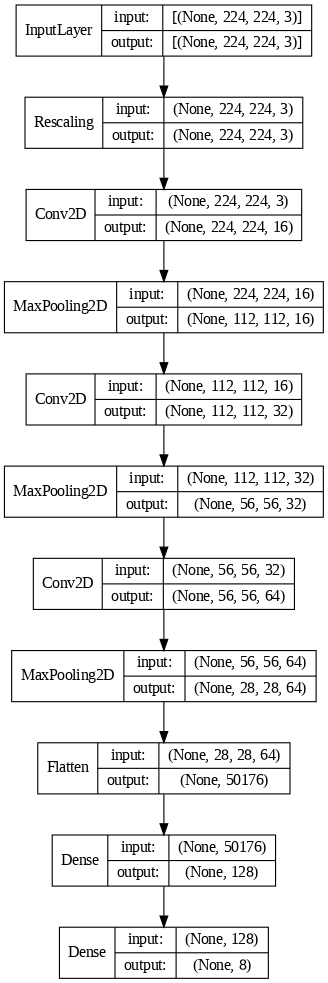

In [13]:
plot_model(cnn_model_1,
           to_file='model1.png',
           show_shapes=True,
           show_layer_names=False,
           rankdir='TB',
           dpi=80)   

In [14]:
epochs=10
history_cnn_model_1 = cnn_model_1.fit(
  train_data,
  validation_data=val_data,
  epochs=epochs
)

Epoch 1/10
100/100 [==============================] - 83s 717ms/step - loss: 1.1677 - accuracy: 0.5691 - val_loss: 0.7673 - val_accuracy: 0.7375
Epoch 2/10
100/100 [==============================] - 10s 99ms/step - loss: 0.4135 - accuracy: 0.8500 - val_loss: 0.4576 - val_accuracy: 0.8450
Epoch 3/10
100/100 [==============================] - 9s 86ms/step - loss: 0.2522 - accuracy: 0.9137 - val_loss: 0.2403 - val_accuracy: 0.9112
Epoch 4/10
100/100 [==============================] - 10s 100ms/step - loss: 0.1310 - accuracy: 0.9591 - val_loss: 0.3681 - val_accuracy: 0.8775
Epoch 5/10
100/100 [==============================] - 10s 100ms/step - loss: 0.0727 - accuracy: 0.9762 - val_loss: 0.3187 - val_accuracy: 0.8938
Epoch 6/10
100/100 [==============================] - 10s 98ms/step - loss: 0.0503 - accuracy: 0.9837 - val_loss: 0.2381 - val_accuracy: 0.9262
Epoch 7/10
100/100 [==============================] - 10s 91ms/step - loss: 0.0375 - accuracy: 0.9891 - val_loss: 0.2593 - val_accurac

[0.5690624713897705, 0.8500000238418579, 0.9137499928474426, 0.9590625166893005, 0.9762499928474426, 0.9837499856948853, 0.989062488079071, 0.9746875166893005, 0.9975000023841858, 0.9987499713897705]
(11,)
range(0, 10)


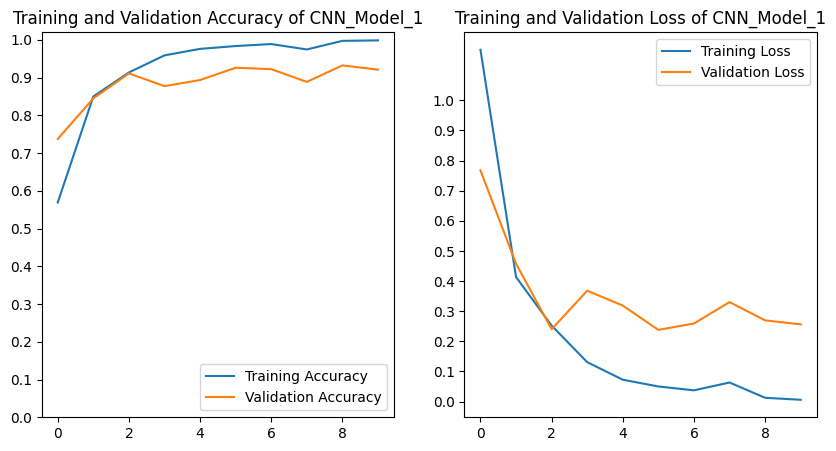

In [15]:
accuracy = history_cnn_model_1.history['accuracy']
print(accuracy)
val_accuracy = history_cnn_model_1.history['val_accuracy']

loss = history_cnn_model_1.history['loss']
val_loss = history_cnn_model_1.history['val_loss']

y_ticks = np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
print(y_ticks.shape)
epochs=10
epochs_count = range(epochs)
print(epochs_count)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_count, accuracy, label='Training Accuracy')
plt.plot(epochs_count, val_accuracy, label='Validation Accuracy')
plt.yticks(y_ticks)
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy of CNN_Model_1')

plt.subplot(1, 2, 2)
plt.plot(epochs_count, loss, label='Training Loss')
plt.plot(epochs_count, val_loss, label='Validation Loss')
plt.yticks(y_ticks)
plt.legend(loc='upper right')
plt.title('Training and Validation Loss of CNN_Model_1')
plt.show()

# Convolution Neural Networks Model-2 with increasing pooling layers

In [37]:
cnn_model_2 = Sequential()
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

cnn_model_2.add(Conv2D(8, kernel_size=5, padding='same', activation='relu', input_shape=(img_height, img_width, 3)))
cnn_model_2.add(MaxPool2D())

cnn_model_2.add(Conv2D(16, kernel_size=5, padding='same', activation='relu'))
cnn_model_2.add(MaxPool2D())

cnn_model_2.add(Conv2D(32, kernel_size=5, padding='same', activation='relu'))
cnn_model_2.add(MaxPool2D())

cnn_model_2.add(Conv2D(64, kernel_size=5, padding='same', activation='relu'))
cnn_model_2.add(MaxPool2D())

# Adding fully connected layers
cnn_model_2.add(Flatten())
cnn_model_2.add(Dense(6*16, activation="relu"))

In [38]:
cnn_model_2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [39]:
cnn_model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 224, 224, 8)       608       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 112, 112, 8)      0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 112, 112, 16)      3216      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 56, 56, 16)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 56, 56, 32)        12832     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 28, 28, 32)      

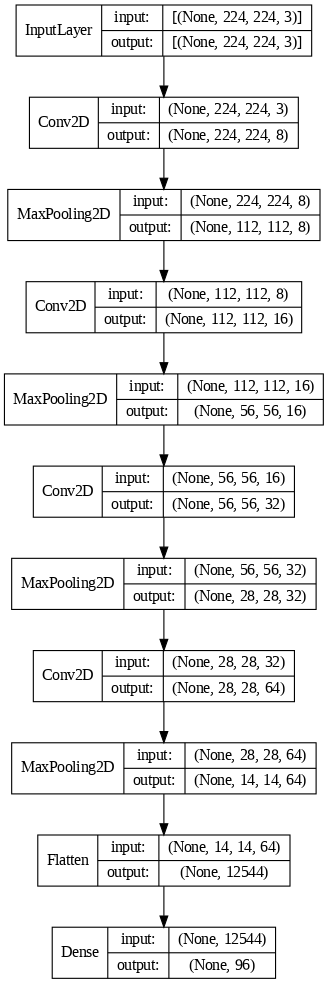

In [40]:
plot_model(cnn_model_2,
           to_file='model2.png',
           show_shapes=True,
           show_layer_names=False,
           rankdir='TB',
           dpi=80)
     

In [42]:
epochs = 15
history_cnn_model_2 = cnn_model_2.fit(
  train_data,
  validation_data=val_data,
  epochs=epochs
)

Epoch 1/15
100/100 [==============================] - 11s 96ms/step - loss: 1.5572 - accuracy: 0.6034 - val_loss: 1.4431 - val_accuracy: 0.6463
Epoch 2/15
100/100 [==============================] - 10s 97ms/step - loss: 1.2064 - accuracy: 0.7119 - val_loss: 1.4349 - val_accuracy: 0.6637
Epoch 3/15
100/100 [==============================] - 9s 86ms/step - loss: 1.0447 - accuracy: 0.7603 - val_loss: 1.3941 - val_accuracy: 0.6913
Epoch 4/15
100/100 [==============================] - 9s 84ms/step - loss: 0.9338 - accuracy: 0.7969 - val_loss: 1.2798 - val_accuracy: 0.6975
Epoch 5/15
100/100 [==============================] - 10s 97ms/step - loss: 0.9017 - accuracy: 0.8087 - val_loss: 1.4077 - val_accuracy: 0.6850
Epoch 6/15
100/100 [==============================] - 10s 95ms/step - loss: 0.7486 - accuracy: 0.8637 - val_loss: 1.5720 - val_accuracy: 0.6525
Epoch 7/15
100/100 [==============================] - 9s 83ms/step - loss: 0.8850 - accuracy: 0.8206 - val_loss: 1.3013 - val_accuracy: 0.

[0.5690624713897705, 0.8500000238418579, 0.9137499928474426, 0.9590625166893005, 0.9762499928474426, 0.9837499856948853, 0.989062488079071, 0.9746875166893005, 0.9975000023841858, 0.9987499713897705]
(11,)
range(0, 10)


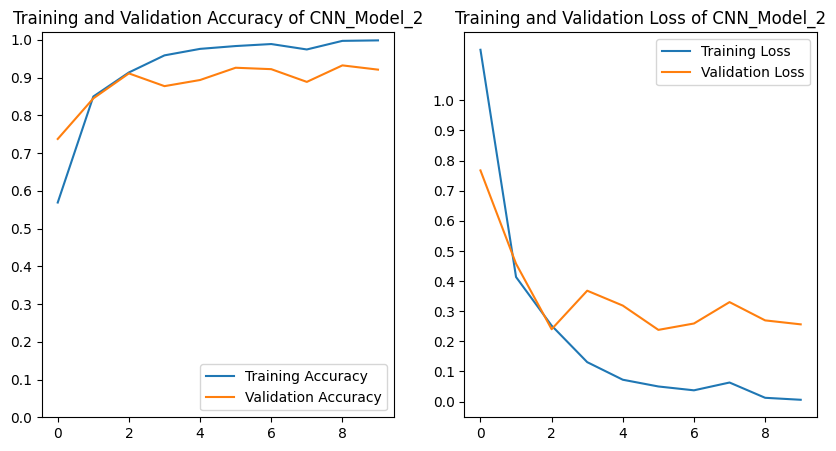

In [76]:
accuracy = history_cnn_model_1.history['accuracy']
print(accuracy)
val_accuracy = history_cnn_model_1.history['val_accuracy']

loss = history_cnn_model_1.history['loss']
val_loss = history_cnn_model_1.history['val_loss']

y_ticks = np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
print(y_ticks.shape)
epochs=10
epochs_count = range(epochs)
print(epochs_count)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_count, accuracy, label='Training Accuracy')
plt.plot(epochs_count, val_accuracy, label='Validation Accuracy')
plt.yticks(y_ticks)
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy of CNN_Model_2')

plt.subplot(1, 2, 2)
plt.plot(epochs_count, loss, label='Training Loss')
plt.plot(epochs_count, val_loss, label='Validation Loss')
plt.yticks(y_ticks)
plt.legend(loc='upper right')
plt.title('Training and Validation Loss of CNN_Model_2')
plt.show()

In [22]:
import glob
from sklearn.model_selection import train_test_split
import os

data = []
labels = []
classes = {}
classes_dir = enumerate(os.listdir(data_dir))
for i, j in classes_dir:
    classes[j] = i
print(classes)


for i in class_names: 
  print(i)
  image_dir = glob.glob(str(data_dir) +'/' + i +'/*' )
  for j in image_dir:
    image=tf.keras.preprocessing.image.load_img(j, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append(classes[i])
    

data = np.array(data)
labels = np.array(labels)
#print(data)
print(labels)

X_train, X_test, ytrain, ytest = train_test_split(data, labels, test_size=0.2,
                                                random_state=42)
                                                

{'Bacterial Canker': 0, 'Gall Midge': 1, 'Sooty Mould': 2, 'Anthracnose': 3, 'Cutting Weevil': 4, 'Die Back': 5, 'Powdery Mildew': 6, 'Healthy': 7}
Anthracnose
Bacterial Canker
Cutting Weevil
Die Back
Gall Midge
Healthy
Powdery Mildew
Sooty Mould
[3 3 3 ... 2 2 2]


In [23]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


In [24]:
np.unique(ytrain)
nsamples, nx, ny, nz = X_train.shape
X_train_modified = X_train.reshape((nsamples,nx*ny*nz))
nsamples, nx, ny, nz = X_test.shape
X_test_modified = X_test.reshape((nsamples,nx*ny*nz))

# Random Forest Classifier

In [25]:
## Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train_modified,ytrain)
random_forest_model_prdiction = random_forest_model.predict(X_test_modified)
accuracy_score(random_forest_model_prdiction,ytest)
print("Report of Random Forest Classification - ")
print(classification_report(random_forest_model_prdiction,ytest))

Report of Random Forest Classification - 
              precision    recall  f1-score   support

           0       0.91      0.85      0.88        92
           1       0.80      0.80      0.80       104
           2       0.80      0.78      0.79        95
           3       0.85      0.92      0.89       114
           4       0.97      0.95      0.96       115
           5       0.90      0.92      0.91        99
           6       0.80      0.96      0.87        76
           7       0.94      0.81      0.87       105

    accuracy                           0.87       800
   macro avg       0.87      0.87      0.87       800
weighted avg       0.88      0.87      0.87       800



# K-Nearest Neighbors Classifier

In [26]:
## KNN classifier model
from sklearn.neighbors import KNeighborsClassifier
knn_classifier_model = KNeighborsClassifier(n_neighbors=15)
knn_classifier_model.fit(X_train_modified,ytrain)
knn_classifier_prediction = knn_classifier_model.predict(X_test_modified)
accuracy_score(knn_classifier_prediction,ytest)
print("Report of KNN Classification - ")
print(classification_report(knn_classifier_prediction,ytest))

Report of KNN Classification - 
              precision    recall  f1-score   support

           0       0.93      0.46      0.62       173
           1       0.48      0.54      0.51        93
           2       0.65      0.59      0.62       101
           3       0.45      0.76      0.56        72
           4       0.56      1.00      0.72        63
           5       0.88      0.56      0.68       160
           6       0.51      0.63      0.56        73
           7       0.56      0.77      0.65        65

    accuracy                           0.62       800
   macro avg       0.63      0.66      0.61       800
weighted avg       0.69      0.62      0.62       800



# Decision Tree Classifier

In [27]:
## Decision Tree Classification
from sklearn.tree import DecisionTreeClassifier
decision_tree_classifier_model = DecisionTreeClassifier()
decision_tree_classifier_model.fit(X_train_modified,ytrain)
decision_tree_prediction = decision_tree_classifier_model.predict(X_test_modified)
accuracy_score(decision_tree_prediction,ytest)
print("Report of Decision Tree Classification - ")
print(classification_report(decision_tree_prediction,ytest))

Report of Decision Tree Classification - 
              precision    recall  f1-score   support

           0       0.67      0.72      0.69        81
           1       0.60      0.54      0.57       115
           2       0.48      0.52      0.50        86
           3       0.63      0.76      0.69       103
           4       0.96      0.89      0.93       121
           5       0.80      0.82      0.81        99
           6       0.63      0.63      0.63        91
           7       0.67      0.58      0.62       104

    accuracy                           0.69       800
   macro avg       0.68      0.68      0.68       800
weighted avg       0.69      0.69      0.69       800



# Naive Bayes Classifier

In [28]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Create a Naive Bayes classifier object
nb_classifier_model = GaussianNB()

# Train the classifier on the training data
nb_classifier_model.fit(X_train_modified, ytrain)

# Make predictions on the test data
nb_prediction = nb_classifier_model.predict(X_test_modified)

# Evaluate the accuracy of the classifier on the test data
nb_accuracy = accuracy_score(nb_prediction, ytest)
print("Accuracy score of Naive Bayes Classifier: ", nb_accuracy)

# Print the classification report
print("Report of Naive Bayes Classifier - ")
print(classification_report(nb_prediction, ytest))

Accuracy score of Naive Bayes Classifier:  0.5575
Report of Naive Bayes Classifier - 
              precision    recall  f1-score   support

           0       0.80      0.70      0.75        99
           1       0.29      0.36      0.32        83
           2       0.37      0.36      0.36        94
           3       0.62      0.63      0.63       120
           4       0.85      0.69      0.76       138
           5       0.41      0.72      0.52        57
           6       0.52      0.47      0.49        99
           7       0.60      0.49      0.54       110

    accuracy                           0.56       800
   macro avg       0.56      0.55      0.55       800
weighted avg       0.59      0.56      0.57       800



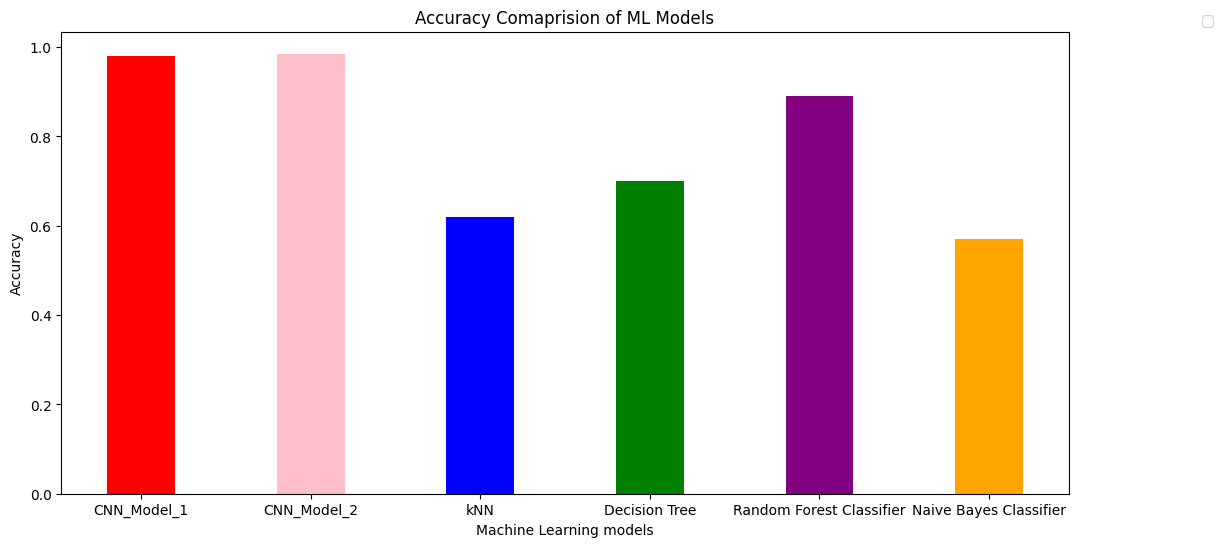

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

models = ['CNN_Model_1','CNN_Model_2','kNN', 'Decision Tree', 'Random Forest Classifier','Naive Bayes Classifier']
val_accuracies = [0.9791, 0.9853, 0.62, 0.70, 0.89,0.56] # hardcoded the results from the output of report/history
X_axis = np.arange(len(models))
colors = ['red', 'pink','blue', 'green', 'purple', 'orange'] # specify the colors here
fig = plt.figure(figsize = (13, 6))
 
# creating the bar plot with colors
plt.bar(X_axis, val_accuracies, width = 0.4, color=colors)
plt.xticks(X_axis, models)
plt.xlabel("Machine Learning models")
plt.ylabel("Accuracy")
plt.title("Accuracy Comaprision of ML Models")
plt.legend(bbox_to_anchor=(1.15, 1.05))
plt.show()


In [32]:
!pip install gradio
import gradio as gr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Predicting using Gradio

In [73]:
def mango_image_classification(model_choice, image_to_classify):
    if model_choice == "CNN Sequential Model-1":
        image_4d = image_to_classify.reshape(-1, 224, 224, 3)
        prediction = cnn_model_1.predict(image_4d)
        class_idx = np.argmax(prediction[0])
        class_name = class_names[class_idx]
        return {class_name: float(prediction[0][class_idx])}
    elif model_choice == "CNN Sequential Model-2":
        image_4d = image_to_classify.reshape(-1, 224, 224, 3)
        prediction = cnn_model_2.predict(image_4d)
        class_idx = np.argmax(prediction[0])
        class_name = class_names[class_idx]
        return {class_name: float(prediction[0][class_idx])}
    elif model_choice == "kNN":
        prediction = knn_classifier_model.predict(image_to_classify.flatten().reshape(1, -1))
        class_name = class_names[prediction[0]]
        class_name = class_names[class_idx]
        return {class_name: 1.0}
    elif model_choice == "Random Forest Classifier":
        prediction = random_forest_model.predict(image_to_classify.flatten().reshape(1, -1))
        class_name = class_names[prediction[0]]
        class_name = class_names[class_idx]
        return {class_name: 1.0}
    elif model_choice == "Decision Tree":
        prediction = decision_tree_classifier_model.predict(image_to_classify.flatten().reshape(1, -1))
        class_name = class_names[prediction[0]]
        class_name = class_names[class_idx]
        return {class_name: 1.0}
    elif model_choice == "Naive Bayes Classifier":
       prediction = nb_classifier_model.predict(image_to_classify.flatten().reshape(1, -1))
       class_name = class_names[prediction[0]]
       class_name = class_names[class_idx]
       return {class_name: 1.0}


image = gr.inputs.Image(shape=(224, 224))
label = gr.outputs.Label(num_top_classes=8)

title = "Mango Image Classifier App"
description = "This is a Mango image classifier app which classifies the disease type of an uploaded image"

gr.Interface(fn=mango_image_classification, 
             inputs=[gr.inputs.Dropdown(["CNN Sequential Model-1","CNN Sequential Model-2", "kNN",  "Random Forest Classifier", "Decision Tree", "Naive Bayes"]), image], 
             outputs=label, 
             title=title, 
             description=description).launch(debug=True)


/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:257: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.10/dist-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)
/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:217: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnin

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

1/1 [==============================] - 0s 29ms/step
Keyboard interruption in main thread... closing server.


In [77]:
'''
def mango_image_classification(model_choice, image_to_classify, top_k=3):
    if model_choice == "CNN Sequential Model-1":
        image_4d = image_to_classify.reshape(-1, 224, 224, 3)
        prediction = cnn_model_1.predict(image_4d)
        class_idx = np.argsort(prediction[0])
        class_probs = prediction[0]
        class_names_top_k = [class_names[i] for i in class_idx]
        return dict(zip(class_names_top_k, class_probs))
    elif model_choice == "CNN Sequential Model-2":
        image_4d = image_to_classify.reshape(-1, 224, 224, 3)
        prediction = cnn_model_2.predict(image_4d)
        class_idx = np.argsort(prediction[0])
        class_probs = prediction[0]
        class_names_top_k = [class_names[i] for i in class_idx]
        return dict(zip(class_names_top_k, class_probs))
    elif model_choice == "kNN":
        prediction = knn_classifier_model.predict_proba(image_to_classify.flatten().reshape(1, -1))
        class_idx = np.argsort(prediction[0])[::-1][:top_k]
        class_probs = prediction[0][class_idx]
        class_names_top_k = [class_names[i] for i in class_idx]
        return dict(zip(class_names_top_k, class_probs))
    elif model_choice == "Random Forest Classifier":
        prediction = random_forest_model.predict_proba(image_to_classify.flatten().reshape(1, -1))
        class_idx = np.argsort(prediction[0])[::-1][:top_k]
        class_probs = prediction[0][class_idx]
        class_names_top_k = [class_names[i] for i in class_idx]
        return dict(zip(class_names_top_k, class_probs))
    elif model_choice == "Decision Tree":
        prediction = decision_tree_classifier_model.predict_proba(image_to_classify.flatten().reshape(1, -1))
        class_idx = np.argsort(prediction[0])[::-1][:top_k]
        class_probs = prediction[0][class_idx]
        class_names_top_k = [class_names[i] for i in class_idx]
        return dict(zip(class_names_top_k, class_probs))
    elif model_choice == "Naive Bayes Classifier":
        prediction = nb_classifier_model.predict_proba(image_to_classify.flatten().reshape(1, -1))
        class_idx = np.argsort(prediction[0])[::-1][:top_k]
        class_probs = prediction[0][class_idx]
        class_names_top_k = [class_names[i] for i in class_idx]
        return dict(zip(class_names_top_k, class_probs))



image = gr.inputs.Image(shape=(224, 224))
label = gr.outputs.Label(num_top_classes=8)

title = "Mango Image Classifier App"
description = "This is a Mango image classifier app which classifies the disease type of an uploaded image"

gr.Interface(fn=mango_image_classification, 
             inputs=[gr.inputs.Dropdown(["CNN Sequential Model-1","CNN Sequential Model-2", "kNN",  "Random Forest Classifier", "Decision Tree", "Naive Bayes"]), image], 
             outputs=label, 
             title=title, 
             description=description).launch(debug=True)
'''

'\ndef mango_image_classification(model_choice, image_to_classify, top_k=3):\n    if model_choice == "CNN Sequential Model-1":\n        image_4d = image_to_classify.reshape(-1, 224, 224, 3)\n        prediction = cnn_model_1.predict(image_4d)\n        class_idx = np.argsort(prediction[0])\n        class_probs = prediction[0]\n        class_names_top_k = [class_names[i] for i in class_idx]\n        return dict(zip(class_names_top_k, class_probs))\n    elif model_choice == "CNN Sequential Model-2":\n        image_4d = image_to_classify.reshape(-1, 224, 224, 3)\n        prediction = cnn_model_2.predict(image_4d)\n        class_idx = np.argsort(prediction[0])\n        class_probs = prediction[0]\n        class_names_top_k = [class_names[i] for i in class_idx]\n        return dict(zip(class_names_top_k, class_probs))\n    elif model_choice == "kNN":\n        prediction = knn_classifier_model.predict_proba(image_to_classify.flatten().reshape(1, -1))\n        class_idx = np.argsort(prediction[